# Projet Visualisation de données


## Introduction

Nous avons choisis de nous intéresser à un problème de santé publique : les accidents vasculaires cérébraux. Nous souhaitons mettre en évidence à travers de cette étude des caractéristiques qui influent sur le risque d'avoir un tel accident. Pour cela nous allons séparer notre étude en deux parties : les caractéristiques propres aux personnes (âge, maladies cardiaques, hypertensions...) par rapport aux choix et aux modes de vie des individus (lieu de résidence, fumeur, mariage, type de travail...).

Êtes vous enclin à être victime d’un AVC ? 

## Présentation du dataset

Le dataset que nous avons choisi, s'intitule 'Ensemble de données de prévision des accidents vasculaires cérébraux'. 

Imports nécessaires pour les différentes visualisation :

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Fonction permettant d'initialiser la database et d'effectuer le prétraitement :

In [26]:
def init_traitement_DB() :

    #Lecture du fichier
    df = pd.read_csv("healthcare-dataset-stroke-data.csv")
    
    # Suppression des lignes avec "Other" dans gender (1 ligne)
    id = df[df["gender"] == "Other"].index
    df = df.drop(id)

    # Suppression des lignes avec "Never_worked" dans work_type
    id = df[df["work_type"] == "Never_worked"].index
    df = df.drop(id)

    # Suppression des lignes avec "NaN" dans bmi
    df = df.dropna(subset=['bmi'])

    return df

In [27]:
df = init_traitement_DB()

In [28]:
df = init_traitement_DB()

## Partie 1 : Comment les caractéristiques propres à un individu influencent-elles le risque d'avoir un AVC ?

À quel âge sommes-nous plus enclins à faire un AVC ? 

In [29]:
df = init_traitement_DB()

Est-ce que le genre affecte les risques de faire un AVC ?

In [30]:
df = init_traitement_DB()

Est-ce que les antécédents de santé ont un impact sur les risques d’avoir un AVC ?".

C’est-à-dire est-ce que les maladies du cœur et l’hypertension ont des conséquences sur le risque de faire un AVC. 

In [31]:
df = init_traitement_DB()

In [32]:
df = init_traitement_DB()

Diagrammes de Venn pour avoir une idée plus précise de la répartition de chaque profil en fonction des deux caractères médicaux. 

In [33]:
df = init_traitement_DB()

In [34]:
df = init_traitement_DB()

## Partie 2 : Comment le mode de vie influence-t-il le risque d'avoir un AVC ?

Pour commencer, en étudiant la base de données, nous nous sommes demandé si la colonne “ever_married”, c’est-à-dire le fait d’être marié, avait un impact sur le risque d’avoir un AVC. Le graphique ci-dessous va nous permettre de représenter la corrélation entre les colonnes “ever_maried” et “stroke”. 

In [35]:
df = init_traitement_DB()

Attention cependant, le fait d’être marié dépend de l’âge. Donc pour avoir des diagrammes plus représentatifs, on va représenter la proportion des personnes ayant eu un AVC en fonction de leur âge et leur situation matrimoniale.

In [36]:
df = init_traitement_DB()

De la même manière, quel est le lien entre le type d’emploi de l'individu et son risque d’avoir un AVC ? 

In [37]:
df = init_traitement_DB()

Sur le même principe, est ce que fumer affecte-t-il la probabilité de faire un AVC ?

In [38]:
df = init_traitement_DB()

Enfin, avant de traiter les données, on s’est tous dit que c’était évident qu’il existait une corrélation entre le lieu de résidence de l’individu et son risque de faire un AVC, est-ce-que les données de la base confirment cette idée ?  

In [39]:
df = init_traitement_DB()

Anisi, un IMC et un taux de glucose moyen dans le sang augmente-t-il le risque de faire un AVC ?

Modèle dynamique :

In [40]:
df = init_traitement_DB()

df_avc = df[df['stroke'] == 1]

# Affichage des points pour les personnes ou individus victimes d'un AVC
trace_stroke = go.Scatter3d(
    x=df[df['stroke'] == 1]['bmi'],
    y=df[df['stroke'] == 1]['avg_glucose_level'],
    z=[1] * len(df[df['stroke'] == 1]),  
    mode='markers',
    marker=dict(
        color='#FF9900',
        size=5,
        opacity=0.9
    ),
    name='AVC'
)

# Affichage des points pour les personnes ou individus non victimes d'un AVC

trace_no_stroke = go.Scatter3d(
    x=df[df['stroke'] == 0]['bmi'],
    y=df[df['stroke'] == 0]['avg_glucose_level'],
    z=[0] * len(df[df['stroke'] == 0]), 
    mode='markers',
    marker=dict(
        color='#9381FF',
        size=5,
        opacity=0.5
    ),
    name='Pas d\'AVC'
)

#Ajout d'un layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='IMC'),
        yaxis=dict(title='Taux de glucose moyen dans le sang'),
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    title='Relation entre IMC, Taux de glucose moyen dans le sang et AVC'
)

fig = go.Figure(data=[trace_stroke, trace_no_stroke], layout=layout)

fig.show()


<Figure size 1500x800 with 0 Axes>

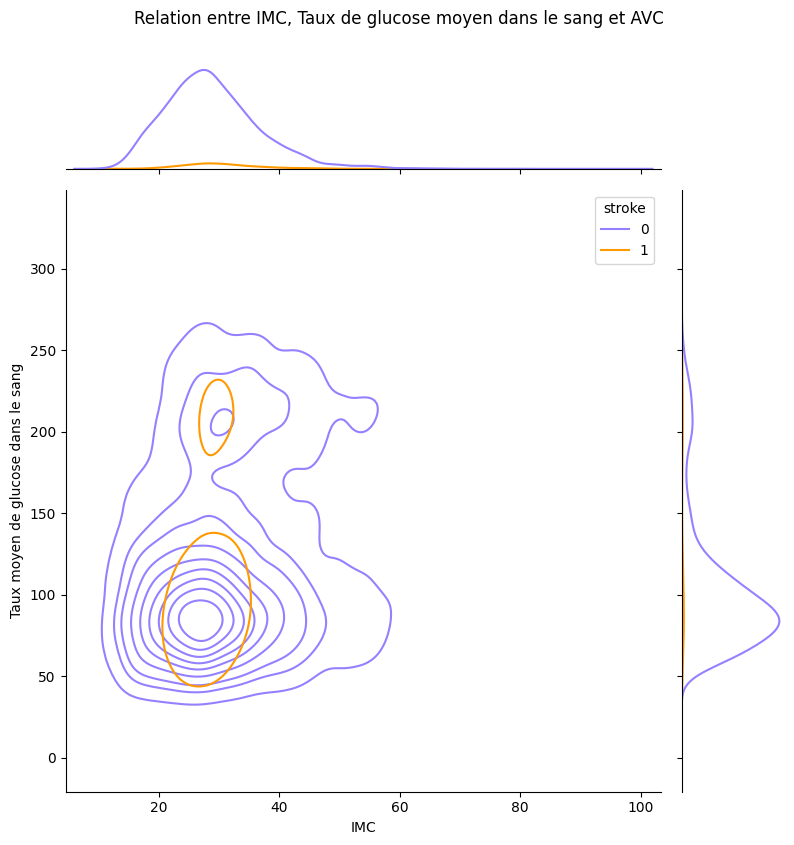

In [41]:
df = init_traitement_DB()

plt.figure(figsize=(15, 8))
g = sns.jointplot(x='bmi', y='avg_glucose_level', data=df, kind='kde', hue='stroke', height=8, palette={0: "#9381FF", 1: "#FF9900"})
g.set_axis_labels('IMC', 'Taux moyen de glucose dans le sang')
plt.suptitle('Relation entre IMC, Taux de glucose moyen dans le sang et AVC', y=1.05)  
plt.show()

In [42]:
df = init_traitement_DB()

Le lieu de vie, le travail et la famille peuvent influencer le taux de stress et donc être la cause d'AVC. Voyons si ces caractères ont un réel impact important sur le risque d’avoir un AVC. 

In [43]:
df = init_traitement_DB()

## Partie 3 : Étude de la corrélation entre les deux familles de facteurs

Pour les individus de moins de 50 ans, est-ce que le taux de glucose, leur lieu de vie et leurs habitudes liées aux tabac ont-ils une influence sur le risque de faire un AVC ?

C:\Users\littl\AppData\Local\Temp\ipykernel_3480\2903077485.py:14: UserWarning:

The sizes list has more values (2) than needed (1), which may not be intended.



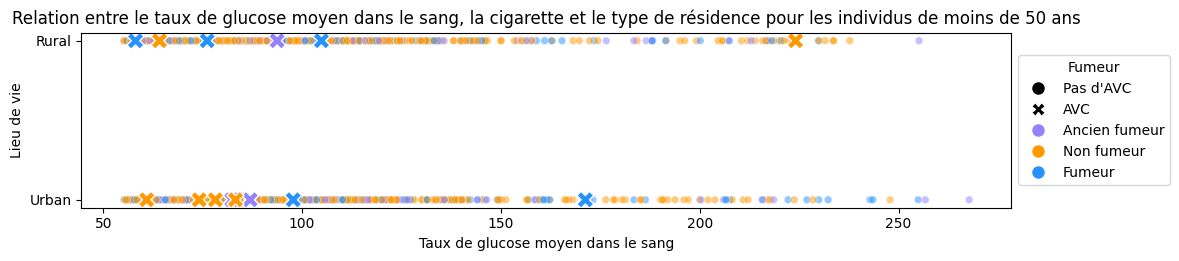

In [44]:
df = init_traitement_DB()

df_below_50 = df[df['age'] < 50]

df_below_50_known_smoking = df_below_50[df_below_50['smoking_status'] != 'Unknown']

df_stroke = df_below_50_known_smoking[df_below_50_known_smoking['stroke'] == 1]
df_no_stroke = df_below_50_known_smoking[df_below_50_known_smoking['stroke'] == 0]

legend_labels = {'formerly smoked': 'Ancien fumeur', 'never smoked': 'Non fumeur', 'smokes': 'Fumeur'}

#Individu n'ayant pas eu un avc
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_no_stroke, x='avg_glucose_level', y='Residence_type', hue='smoking_status',
                palette={'formerly smoked': '#9381FF', 'never smoked': '#FF9900', 'smokes': '#2692FF'},
                size='stroke', sizes=[30, 150], style='stroke', markers=['o'], alpha=0.5)

#Individu ayant eu un avc
sns.scatterplot(data=df_stroke, x='avg_glucose_level', y='Residence_type', hue='smoking_status',
                palette={'formerly smoked': '#9381FF', 'never smoked': '#FF9900', 'smokes': '#2692FF'},
                size='stroke', sizes=[150], marker='X', zorder=2)

#Création de la légende
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#000000', markersize=10, label='Pas d\'AVC'),
    plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='#000000', markersize=10, label='AVC'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#9381FF', markersize=10, label='Ancien fumeur'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF9900', markersize=10, label='Non fumeur'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#2692FF', markersize=10, label='Fumeur')
]

plt.legend(handles=custom_legend, title='Fumeur', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Relation entre le taux de glucose moyen dans le sang, la cigarette et le type de résidence pour les individus de moins de 50 ans')
plt.xlabel('Taux de glucose moyen dans le sang')
plt.ylabel('Lieu de vie')
plt.gca().set_aspect(40)  #gère l'espace vertical

Si on regroupe l'ensemble des caractéristiques liées à la santé, voyons comment sont réparties les individus. 

In [45]:
df = init_traitement_DB()

## Conclusion

Correlation

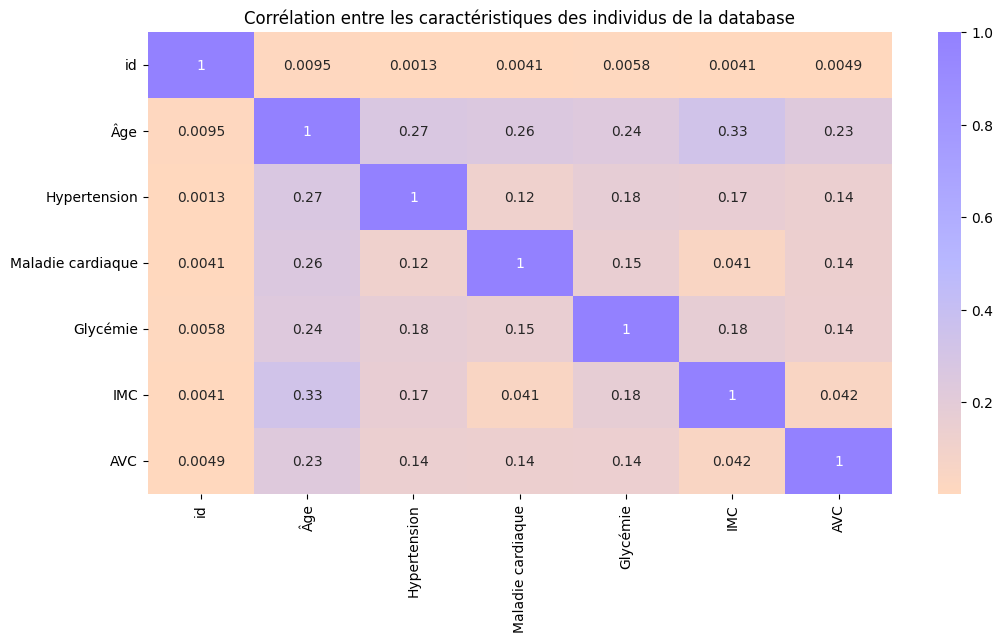

In [75]:
df = init_traitement_DB()

def get_custom_color_palette_hash():
    return LinearSegmentedColormap.from_list("", [
        '#FFD8BE',
        '#B8B8FF',
        '#9381FF'
    ])

df = df.rename(columns={'age': 'Âge', 'hypertension': 'Hypertension', 'heart_disease': 'Maladie cardiaque', 'avg_glucose_level': "Glycémie", "bmi": "IMC", "stroke": "AVC"}, errors="raise")

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = get_custom_color_palette_hash() )
plt.title('Corrélation entre les caractéristiques des individus de la database')
plt.show()

Regardons vos risques !

In [76]:
df = init_traitement_DB()

id2 = df[df["smoking_status"] == "Unknown"].index
df = df.drop(id2)
# On regroupe les colonnes par ce que l'on souhaite faire avec en renommant les variables
def map_values(column, mapping, default='Unknown'):
    return column.map(lambda x: mapping.get(x, default))

# Définition des fonctions de mapping
hypertension_mapping = {0: 'Pas d\'hypertension', 1: 'Hypertension'}
heart_disease_mapping = {0: 'Pas de maladie cardiaque', 1: 'Maladie cardiaque'}
stroke_mapping = {0: 'Pas d\'AVC', 1: 'AVC'}
residence_type_mapping = {'Urban': 'Citadin', 'Rural': 'Rural'}
gender_mapping = {'Male': 'Homme', 'Female': 'Femme', 'Other': 'Autre'}
smoking_status_mapping = {'formerly smoked': 'Ancien fumeur', 'never smoked': 'Non fumeur', 'smokes': 'Fumeur'}

# On effectue chaque mapping à chaque colonne
df['gender'] = map_values(df['gender'], gender_mapping)
df['hypertension'] = map_values(df['hypertension'], hypertension_mapping)
df['heart_disease'] = map_values(df['heart_disease'], heart_disease_mapping)
df['stroke'] = map_values(df['stroke'], stroke_mapping)
df['smoking_status'] = map_values(df['smoking_status'], smoking_status_mapping)
df['Residence_type'] = map_values(df['Residence_type'], residence_type_mapping)

# On décide de couper la population en deux : les plus ou moins de 50 ans
df['age_group'] = pd.cut(df['age'], bins=[0, 50, float('inf')], labels=['Moins de 50', 'Plus de 50'])

# On les regroupe et on compte les individus par catégorie
grouped = df.groupby(['gender', 'age_group', 'smoking_status', 'Residence_type', 'hypertension', 'heart_disease', 'stroke']).size().reset_index(name='count')

# On calcule les pourcentage dans le dernier cercle
total_strokes = grouped[grouped['stroke'] == 'AVC']['count'].sum()
grouped['percentage'] = grouped.apply(lambda row: (row['count'] / total_strokes) * 100 if row['stroke'] == 'AVC' else None, axis=1)


fig = px.sunburst(grouped, path=['gender', 'age_group', 'smoking_status', 'Residence_type', 'hypertension', 'heart_disease', 'stroke'], values='percentage')

fig.update_layout(
    title="Diagramme en anneau représentant le pourcentage d'AVC en fonctions de certaines catégories",
    width=1300,  
    height=1300   
)

fig.show()




C:\Users\littl\AppData\Local\Temp\ipykernel_3480\2514950100.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\littl\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\littl\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\litt